# Corpus Normalization

I began with a list provided by Stephen Wittek on McGill University’s [Early Modern Conversions Project](http://earlymodernconversions.com/) website of the normalizations used for the EEBO texts that make up the Distant Reading Early Modernity (DREaM) database developed by Dr. Wittek, Stéfan Sinclair and Matthew Milner. There are 80,676 terms on this list; to these I added others that related to female masculinity, gender, and emotion. In order to determine which spellings of key terms to include, I used the “check for variants” tool on the EEBO search page:
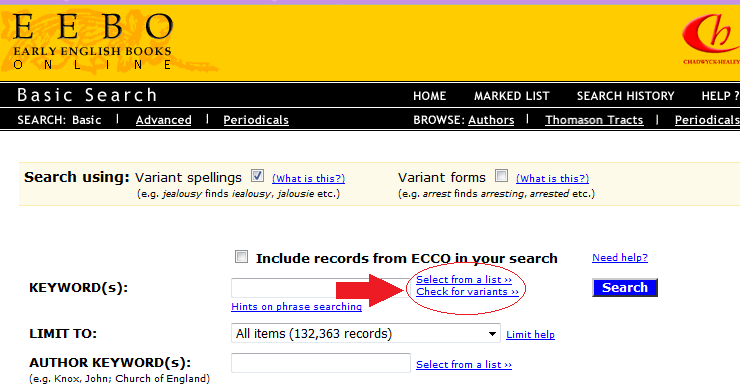

Which brings the user to a list of the various spellings of your search term that can be found in EEBO:
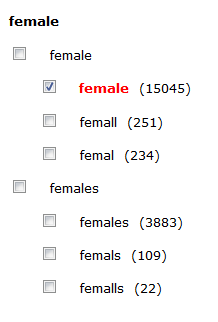

This is what the list looked like the the spreadsheet. For each word, there is an original and normalized spelling:

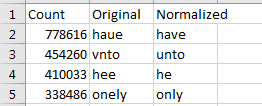

I imported CSV file and used csv.DictReader to read it as an ordered dictionary. 

In [11]:
# https://docs.python.org/3/library/csv.html

import csv
lines = []

with open(".vard-normalizations-wittek-csv.csv", newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        lines.append(row)

I then looped through the ordered dictionary and made a new dictionary that translates the original spelling into the normalized spelling. That is, if the original spelling is used as input, the dictonary will output the normalized spelling. 

In [4]:
dictionary = {}
for line in lines:
    original = line["Original"]
    normalized = line["Normalized"]
    dictionary[original.lower()] = normalized.lower() # made the spellings lower-cased

Here are a couple of examples:

In [9]:
dictionary['haue']

'have'

In [10]:
dictionary['himselfe']

'himself'

Here is an example of how this can be used on a single text:

In [19]:
# reading text

import os

with open ("test_corpus/1557.A20012.final.txt", "r") as f:
    test_string = f.read()

In [20]:
# tokenizing text
import nltk

test_tokens = nltk.word_tokenize(test_string)
test_tokens[:10]

['The',
 'deceyte',
 'of',
 'women',
 '.',
 'to',
 'the',
 'instruction',
 'and',
 'ensample']

In [24]:
# looping through the tokens and replacing any original spellings found in the dictionary with the modernized spelling

standardized_test_tokens = []
count = 0

for word in test_tokens:
    if dictionary.get(word.lower()) is not None: # looking up if lowercase word is a key in the dictionary
        
        # showing the first ten instances of an original spelling being replaced with a modernized spelling: if the count is
        # less than 10, it will print
        if count < 10: 
            print("replacing {} with {}".format(word, dictionary[word.lower()])) 
            count=count + 1
            
        standardized_test_tokens.append(dictionary[word.lower()]) # returns the dictionary value, which is the standardized spelling 
                                                                    # and appends it to the token list
    else:
        standardized_test_tokens.append(word) # appends the word to the token list

replacing deceyte with deceit
replacing deceyte with deceit
replacing infecte with infect
replacing demeanor with demeanour
replacing wyles with wiles
replacing mischeuous with mischievous
replacing complayneth with complains
replacing propertyes with properties
replacing fruytes with fruits
replacing mids with midst


In [25]:
standardized_test_tokens[:10]

['The',
 'deceit',
 'of',
 'women',
 '.',
 'to',
 'the',
 'instruction',
 'and',
 'ensample']

I made the above loop into a function:

In [27]:
def normalizing_function(filename):
    currentName = os.path.join(os.getcwd(), "WORKING_CORPUS", filename) # gets the name of the file including the path
    with open (currentName, "r") as f:
        fileString = f.read()
    fileTokens = nltk.word_tokenize(fileString)
    standardizedTokens = []
    for word in fileTokens:
        if dictionary.get(word.lower()) is not None: 
            standardizedTokens.append(dictionary[word.lower()])
        else:
            standardizedTokens.append(word)  
    with open("WORKING_CORPUS_NORMALIZED/"+filename.replace(".headed.txt",".norm.txt"), "w") as f: # places the files in another folder and renames them
        f.write(" ".join(standardizedTokens)) # makes the list back into a string and puts a space between each token

And then looped through filenames in my corpus with this function:

In [15]:
for filename in os.listdir("WORKING_CORPUS"):
    normalizing_function(filename)

This resulted in a corpus that was easier to work with, though there was still a degree of spelling variability within it. 